# IoT Malware Binary Classification Prediction

This notebook focuses on loading a pre-trained binary classification model (Malware vs. Benign), loading test data, and using the model to make and visualize binary predictions.

In [33]:
# ==============================================================================
# CORE SCRIPT: IoT Malware Binary Classification Prediction
# ==============================================================================

# --- Step 1: Mount your Google Drive ---
# This will prompt you for authorization. Follow the link to get your code.
from google.colab import drive
drive.mount('/content/drive')
print("✅ Google Drive mounted successfully.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive mounted successfully.


In [34]:
# --- Step 2: Import all necessary libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score # Import necessary metrics for evaluation

## Define Binary Model Paths

Define the file paths for your saved binary classification model and its corresponding scaler.

In [35]:
# --- Step 3: Define the paths to your saved binary model and scaler ---
# IMPORTANT: Update these paths to where your binary model and scaler are saved
BINARY_MODEL_PATH = '/content/drive/MyDrive/Colab Notebooks/ML_Models/3_RF_Improved_Version/iot_malware_rf_undersampled_model.pkl' # Example path, UPDATE THIS PATH
BINARY_SCALER_PATH = '/content/drive/MyDrive/Colab Notebooks/ML_Models/3_RF_Improved_Version/iot_malware_undersampled_scaler.pkl' # Example path, UPDATE THIS PATH

print(f"Binary Model Path: {BINARY_MODEL_PATH}")
print(f"Binary Scaler Path: {BINARY_SCALER_PATH}")

Binary Model Path: /content/drive/MyDrive/Colab Notebooks/ML_Models/3_RF_Improved_Version/iot_malware_rf_undersampled_model.pkl
Binary Scaler Path: /content/drive/MyDrive/Colab Notebooks/ML_Models/3_RF_Improved_Version/iot_malware_undersampled_scaler.pkl


## Load Binary Model and Scaler

Load the saved binary classification model and scaler from the defined paths.

In [36]:
# --- Step 4: Load the saved binary model and scaler ---
print("\n" + "="*50)
print("LOADING BINARY MODEL AND SCALER")
print("="*50)

try:
    # Load the model
    loaded_binary_model = joblib.load(BINARY_MODEL_PATH)
    # Load the scaler
    loaded_binary_scaler = joblib.load(BINARY_SCALER_PATH)
    print("\nBinary model and scaler loaded successfully.")

except FileNotFoundError:
    print("\nError: Binary model or scaler file not found.")
    print(f"Please check the paths: \nModel: {BINARY_MODEL_PATH} \nScaler: {BINARY_SCALER_PATH}")
    loaded_binary_model = None # Set to None if loading fails
    loaded_binary_scaler = None # Set to None if loading fails
except Exception as e:
    print(f"\nAn error occurred during binary model/scaler loading: {e}")
    loaded_binary_model = None # Set to None if loading fails
    loaded_binary_scaler = None # Set to None if loading fails

# Check if model and scaler were loaded successfully before proceeding
if loaded_binary_model is None or loaded_binary_scaler is None:
    raise Exception("Binary Model or Scaler failed to load. Please fix the paths and try again.")


LOADING BINARY MODEL AND SCALER

Binary model and scaler loaded successfully.


## Load and Combine Test Data

Load and combine all CSV files from the test data directory.

In [37]:
# --- Step 5: Load and combine all test data ---
DATASET_ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks/test_data' # Set the path to your dataset

print("\nLoading and combining all data files...")
all_dfs = []

all_data_files = []
for dirpath, _, filenames in os.walk(DATASET_ROOT_PATH):
    for f in filenames:
        if f.endswith('.csv'):
            all_data_files.append(os.path.join(dirpath, f))

if not all_data_files:
    raise Exception(f"No CSV files found in the specified path: {DATASET_ROOT_PATH}")


for file_path in all_data_files:
    try:
        # Load each CSV file
        df = pd.read_csv(file_path)
        all_dfs.append(df)
        # print(f"  Successfully loaded {file_path}") # Uncomment for detailed progress
    except Exception as e:
        print(f"  Error loading {file_path}: {e}")

# Combine all DataFrames
if all_dfs:
    combined_test_df_binary = pd.concat(all_dfs, ignore_index=True)
    print("\nData combining complete.")
    print(f"Shape of combined test dataset: {combined_test_df_binary.shape}")
    # Display the first few rows and info to understand the structure
    print("\nFirst 5 rows of the combined test dataset:")
    display(combined_test_df_binary.head())
    print("\nInfo of the combined test dataset:")
    combined_test_df_binary.info()

else:
    raise Exception("No data files were successfully loaded from the test directory.")


Loading and combining all data files...

Data combining complete.
Shape of combined test dataset: (652100, 115)

First 5 rows of the combined test dataset:


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,554.0,0.000000e+00,1.000000,554.0,0.000000e+00,1.000000,554.0,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,554.0,0.000000,554.0,0.000000e+00,0.0,0.0
1,1.982862,554.0,5.820766e-11,1.989681,554.0,0.000000e+00,1.996549,554.0,5.820766e-11,1.999654,...,1.164153e-10,0.0,0.0,1.999965,554.0,0.000000,554.0,0.000000e+00,0.0,0.0
2,2.947407,554.0,0.000000e+00,2.968259,554.0,1.164153e-10,2.989357,554.0,0.000000e+00,2.998933,...,1.164153e-10,0.0,0.0,2.999893,554.0,0.000000,554.0,0.000000e+00,0.0,0.0
3,3.886950,554.0,0.000000e+00,3.931577,554.0,0.000000e+00,3.976992,554.0,5.820766e-11,3.997690,...,1.164153e-10,0.0,0.0,3.999769,554.0,0.000008,554.0,5.820766e-11,0.0,0.0
4,4.830437,554.0,0.000000e+00,4.897179,554.0,0.000000e+00,4.965359,554.0,5.820766e-11,4.996519,...,0.000000e+00,0.0,0.0,4.999652,554.0,0.000000,554.0,0.000000e+00,0.0,0.0



Info of the combined test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652100 entries, 0 to 652099
Columns: 115 entries, MI_dir_L5_weight to HpHp_L0.01_pcc
dtypes: float64(115)
memory usage: 572.1 MB


In [38]:
# # --- Step 5: Load and combine a subset of test data ---
# import os # Import os here
# import pandas as pd # Import pandas here
# DATASET_ROOT_PATH = '/content/drive/MyDrive/Colab Notebooks/test_data' # Set the path to your dataset
# ROWS_TO_LOAD_PER_FILE = 1000 # Define how many rows to load from each CSV file. Adjust this number based on your RAM.

# print("\nLoading and combining a subset of data files...")
# all_dfs = []

# all_data_files = []
# for dirpath, _, filenames in os.walk(DATASET_ROOT_PATH):
#     for f in filenames:
#         if f.endswith('.csv'):
#             all_data_files.append(os.path.join(dirpath, f))

# if not all_data_files:
#     raise Exception(f"No CSV files found in the specified path: {DATASET_ROOT_PATH}")


# for file_path in all_data_files:
#     try:
#         # Load a subset of rows from each CSV file
#         # Use nrows parameter to limit the number of rows read
#         df = pd.read_csv(file_path, nrows=ROWS_TO_LOAD_PER_FILE)
#         all_dfs.append(df)
#         print(f"  Successfully loaded {len(df)} rows from {file_path}") # Print actual number of rows loaded
#     except Exception as e:
#         print(f"  Error loading {file_path}: {e}")

# # Combine all DataFrames from the subsets
# if all_dfs:
#     combined_test_df_binary = pd.concat(all_dfs, ignore_index=True)
#     print("\nData combining complete.")
#     print(f"Shape of combined test dataset (subset): {combined_test_df_binary.shape}")
#     # Display the first few rows and info to understand the structure
#     print("\nFirst 5 rows of the combined test dataset (subset):")
#     display(combined_test_df_binary.head())
#     print("\nInfo of the combined test dataset (subset):")
#     combined_test_df_binary.info()

# else:
#     raise Exception("No data files were successfully loaded from the test directory.")

## Prepare Data for Binary Prediction

Preprocess the combined test data to match the features expected by the loaded binary model and scaler.

In [39]:
# --- Step 6: Prepare data for binary prediction ---

# Separate features (X) from potential identifier/label columns
# Assuming 'Flow_ID' and potentially 'label', 'device', 'attack_type'
# are not features used by the binary model
columns_to_drop_binary_prediction = ['Flow_ID', 'label', 'device', 'attack_type']

X_test_raw_binary = combined_test_df_binary.drop(columns=[col for col in columns_to_drop_binary_prediction if col in combined_test_df_binary.columns])

print(f"\nShape of raw test features (X_test_raw_binary): {X_test_raw_binary.shape}")

# Align columns with the scaler's expected features
# Get the feature names the scaler was fitted on from the loaded binary scaler
if 'loaded_binary_scaler' not in locals() or loaded_binary_scaler is None:
     raise Exception("Error: Binary scaler not loaded. Cannot align features.")

scaler_feature_names_binary = loaded_binary_scaler.feature_names_in_

# Add missing columns to X_test_raw_binary with default value (e.g., 0)
missing_cols_test_binary = set(scaler_feature_names_binary) - set(X_test_raw_binary.columns)
for c in missing_cols_test_binary:
    X_test_raw_binary[c] = 0

# Ensure the order of columns in X_test_raw_binary is the same as in scaler_feature_names_binary
X_test_aligned_binary = X_test_raw_binary[scaler_feature_names_binary]

print(f"Shape of aligned test data (X_test_aligned_binary): {X_test_aligned_binary.shape}")

# Scale the aligned test data using the loaded binary scaler
X_test_scaled_binary = loaded_binary_scaler.transform(X_test_aligned_binary)
print("\nTest data scaled successfully using the loaded binary scaler.")


Shape of raw test features (X_test_raw_binary): (652100, 115)
Shape of aligned test data (X_test_aligned_binary): (652100, 115)

Test data scaled successfully using the loaded binary scaler.


## Make Binary Predictions

Use the loaded binary model and the prepared test data to make predictions (Malware or Benign).

In [40]:
# --- Step 7: Make binary predictions ---

# Make predictions on the scaled test data
if 'loaded_binary_model' in locals() and loaded_binary_model is not None:
    binary_predictions = loaded_binary_model.predict(X_test_scaled_binary)
    print("\nBinary predictions made on the test data.")

    # Display the predictions (0: Benign, 1: Malware)
    print("\nSample Binary Predictions (0: Benign, 1: Malware):")
    print(binary_predictions[:20]) # Display first 20 predictions

    # Count the number of benign and malware predictions
    predicted_binary_counts = pd.Series(binary_predictions).value_counts().sort_index()
    print("\nPredicted Binary Counts (0: Benign, 1: Malware):")
    print(predicted_binary_counts)

else:
    raise Exception("Error: Binary model not loaded. Cannot make predictions.")


Binary predictions made on the test data.

Sample Binary Predictions (0: Benign, 1: Malware):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Predicted Binary Counts (0: Benign, 1: Malware):
0    652100
Name: count, dtype: int64


## Visualize Binary Predictions

Visualize the distribution of the predicted binary labels (Malware vs. Benign).

/tmp/ipython-input-2494067807.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=predicted_binary_counts_labels.index, y=predicted_binary_counts_labels.values, palette='viridis')


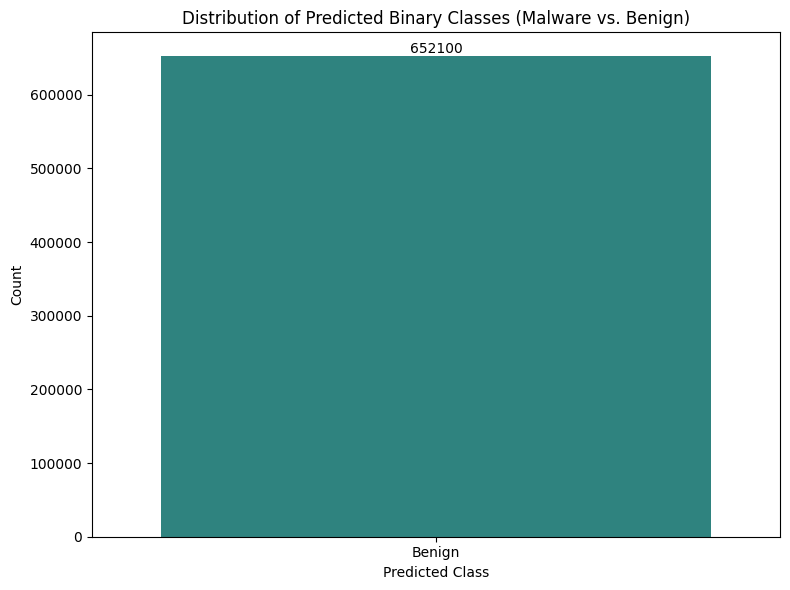


'label' column not found in the test data. Cannot calculate evaluation metrics.


In [41]:
# --- Step 8: Visualize binary predictions ---

# Map encoded predictions back to original labels
binary_labels = ['Benign', 'Malware']
predicted_binary_labels = [binary_labels[pred] for pred in binary_predictions]

# Calculate the counts of each predicted binary class
predicted_binary_counts_labels = pd.Series(predicted_binary_labels).value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=predicted_binary_counts_labels.index, y=predicted_binary_counts_labels.values, palette='viridis')

# Add title and labels
plt.title('Distribution of Predicted Binary Classes (Malware vs. Benign)')
plt.xlabel('Predicted Class')
plt.ylabel('Count')

# Add text labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)


# Display the plot
plt.tight_layout()
plt.show()

# Optional: If the combined_test_df_binary has a 'label' column with true binary labels (0 or 1),
# you can generate evaluation metrics and a confusion matrix.
if 'label' in combined_test_df_binary.columns:
    print("\n" + "="*50)
    print("BINARY MODEL EVALUATION (if true labels available)")
    print("="*50)

    y_true_binary = combined_test_df_binary['label']

    # Calculate and display Accuracy
    accuracy = accuracy_score(y_true_binary, binary_predictions)
    print(f"\nAccuracy: {accuracy:.4f}")

    # Calculate and display Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true_binary, binary_predictions)
    print(cm)

    # Display Classification Report (includes Precision, Recall, F1-score)
    print("\nClassification Report:")
    print(classification_report(y_true_binary, binary_predictions, target_names=['Benign', 'Malware']))

    # Plot Confusion Matrix for better visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

else:
    print("\n'label' column not found in the test data. Cannot calculate evaluation metrics.")

## ROC Curve and AUC Score

Generate and plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC) score. This helps evaluate the model's ability to distinguish between the two classes.

In [42]:
# --- Step 9: Plot ROC Curve and calculate AUC (if true labels available) ---

from sklearn.metrics import roc_curve, auc, RocCurveDisplay # Import necessary metrics

if 'label' in combined_test_df_binary.columns:
    print("\n" + "="*50)
    print("ROC CURVE AND AUC SCORE (if true labels available)")
    print("="*50)

    y_true_binary = combined_test_df_binary['label']

    # Assuming the binary model predicts probabilities (most classifiers do)
    # If your model has a decision_function instead of predict_proba, you'll need to adjust
    if hasattr(loaded_binary_model, 'predict_proba'):
        y_scores_binary = loaded_binary_model.predict_proba(X_test_scaled_binary)[:, 1] # Probability of the positive class (Malware)

        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_true_binary, y_scores_binary)

        # Calculate AUC
        roc_auc = auc(fpr, tpr)
        print(f"\nAUC (Area Under the Curve): {roc_auc:.4f}")

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    elif hasattr(loaded_binary_model, 'decision_function'):
         print("\nModel has decision_function. ROC curve plotting from decision_function is not implemented here.")
         # You would need to calculate fpr, tpr, and thresholds from decision_function if needed.
         # y_scores_binary = loaded_binary_model.decision_function(X_test_scaled_binary)
         # fpr, tpr, thresholds = roc_curve(y_true_binary, y_scores_binary)
         # roc_auc = auc(fpr, tpr)
         # print(f"\nAUC (Area Under the Curve): {roc_auc:.4f}")
         # ... plotting code ...

    else:
        print("\nWarning: The loaded binary model does not have 'predict_proba' or 'decision_function'. Cannot plot ROC curve.")

else:
    print("\n'label' column not found in the test data. Cannot calculate AUC or plot ROC curve.")


'label' column not found in the test data. Cannot calculate AUC or plot ROC curve.


# **Log CPU and memory usage before and after prediction,**

 **Store these logs in the "model_resource_usage_logs" folder in Google Drive, and visualize the current resource usage compared to historical usage from the logs.**


## Install necessary libraries

### Subtask:
Install libraries for monitoring system resources if needed.


**Reasoning**:
Check if psutil is installed and install it if necessary.



In [43]:
import psutil

## Modify prediction code

### Subtask:
Add code to capture resource usage metrics (CPU, memory) before and after the model prediction step.


**Reasoning**:
Add code to capture resource usage metrics (CPU, memory) before and after the model prediction step using psutil.



In [44]:
# --- Step 7: Make binary predictions ---

# Capture resource usage before prediction
cpu_percent_before = psutil.cpu_percent(interval=1) # Measure CPU usage over 1 second
memory_before = psutil.virtual_memory().used

# Make predictions on the scaled test data
if 'loaded_binary_model' in locals() and loaded_binary_model is not None:
    binary_predictions = loaded_binary_model.predict(X_test_scaled_binary)
    print("\nBinary predictions made on the test data.")

    # Capture resource usage after prediction
    cpu_percent_after = psutil.cpu_percent(interval=1) # Measure CPU usage over 1 second
    memory_after = psutil.virtual_memory().used

    # Calculate memory consumed during prediction
    memory_consumed = memory_after - memory_before

    print(f"\nCPU Usage Before Prediction: {cpu_percent_before}%")
    print(f"Memory Usage Before Prediction: {memory_before} bytes")
    print(f"CPU Usage After Prediction: {cpu_percent_after}%")
    print(f"Memory Usage After Prediction: {memory_after} bytes")
    print(f"Memory Consumed During Prediction: {memory_consumed} bytes")


    # Display the predictions (0: Benign, 1: Malware)
    print("\nSample Binary Predictions (0: Benign, 1: Malware):")
    print(binary_predictions[:20]) # Display first 20 predictions

    # Count the number of benign and malware predictions
    predicted_binary_counts = pd.Series(binary_predictions).value_counts().sort_index()
    print("\nPredicted Binary Counts (0: Benign, 1: Malware):")
    print(predicted_binary_counts)

else:
    raise Exception("Error: Binary model not loaded. Cannot make predictions.")


Binary predictions made on the test data.

CPU Usage Before Prediction: 4.0%
Memory Usage Before Prediction: 4915302400 bytes
CPU Usage After Prediction: 3.0%
Memory Usage After Prediction: 4884078592 bytes
Memory Consumed During Prediction: -31223808 bytes

Sample Binary Predictions (0: Benign, 1: Malware):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Predicted Binary Counts (0: Benign, 1: Malware):
0    652100
Name: count, dtype: int64


## Log resource usage

### Subtask:
Store the captured resource usage metrics in a structured format (e.g., CSV or a simple text file) within the specified Google Drive folder (`model_resource_usage_logs`). Include a timestamp or run identifier.


**Reasoning**:
Store the captured resource usage metrics in a structured format within the specified Google Drive folder.



In [45]:
# --- Step 8: Log resource usage ---
from datetime import datetime # Import datetime here
import os # Import os here

LOGS_DIR = '/content/drive/MyDrive/Colab Notebooks/model_resource_usage_logs'
os.makedirs(LOGS_DIR, exist_ok=True) # Create the directory if it doesn't exist

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
LOG_FILE_PATH = os.path.join(LOGS_DIR, f'binary_prediction_resource_usage_{timestamp}.csv')

# Data to be logged
log_data = {
    'timestamp': timestamp,
    'cpu_percent_before': cpu_percent_before,
    'memory_before': memory_before,
    'cpu_percent_after': cpu_percent_after,
    'memory_after': memory_after,
    'memory_consumed': memory_consumed
}

# Create a DataFrame for easier handling
log_df = pd.DataFrame([log_data])

# Check if file exists to write header
if not os.path.exists(LOG_FILE_PATH):
    log_df.to_csv(LOG_FILE_PATH, index=False, mode='w')
else:
    log_df.to_csv(LOG_FILE_PATH, index=False, mode='a', header=False)

print(f"\nResource usage logged to: {LOG_FILE_PATH}")


Resource usage logged to: /content/drive/MyDrive/Colab Notebooks/model_resource_usage_logs/binary_prediction_resource_usage_20250803_192740.csv


## Read historical logs

### Subtask:
Load the historical resource usage data from the log files in the Google Drive folder.


**Reasoning**:
Load the historical resource usage data from the log files in the Google Drive folder.



In [46]:
# --- Step 9: Load historical resource usage data ---
import os
import pandas as pd

LOGS_DIR = '/content/drive/MyDrive/Colab Notebooks/model_resource_usage_logs'

print(f"\nLoading historical resource usage data from: {LOGS_DIR}")

all_log_files = []
for dirpath, _, filenames in os.walk(LOGS_DIR):
    for f in filenames:
        if f.endswith('.csv'):
            all_log_files.append(os.path.join(dirpath, f))

if not all_log_files:
    print(f"No historical log files found in {LOGS_DIR}.")
    historical_resource_usage_df = pd.DataFrame() # Create an empty DataFrame if no files found
else:
    all_log_dfs = []
    for file_path in all_log_files:
        try:
            log_df = pd.read_csv(file_path)
            all_log_dfs.append(log_df)
            # print(f"  Successfully loaded {file_path}") # Uncomment for detailed progress
        except Exception as e:
            print(f"  Error loading {file_path}: {e}")

    if all_log_dfs:
        historical_resource_usage_df = pd.concat(all_log_dfs, ignore_index=True)
        print("\nHistorical resource usage data combining complete.")
        print(f"Shape of historical resource usage data: {historical_resource_usage_df.shape}")
        # Display the first few rows and info to understand the structure
        print("\nFirst 5 rows of historical resource usage data:")
        display(historical_resource_usage_df.head())
    else:
        print("\nNo historical log files were successfully loaded.")
        historical_resource_usage_df = pd.DataFrame() # Create an empty DataFrame if no files successfully loaded


Loading historical resource usage data from: /content/drive/MyDrive/Colab Notebooks/model_resource_usage_logs

Historical resource usage data combining complete.
Shape of historical resource usage data: (12, 6)

First 5 rows of historical resource usage data:


,timestamp,cpu_percent_before,memory_before,cpu_percent_after,memory_after,memory_consumed
0,20250730_205905,91.0,5239107584,10.6,5264928768,25821184
1,20250730_210651,5.5,9323851776,4.5,9328209920,4358144
2,20250801_221615,58.9,5626425344,3.5,5652049920,25624576
3,20250801_222102,3.5,5621174272,3.5,5584646144,-36528128
4,20250802_082609,4.0,5554716672,3.5,5574647808,19931136


## Visualize resource usage trends

### Subtask:
Create plots (e.g., line plots or bar plots) to visualize the resource usage over different runs or timestamps, allowing for comparison of current usage with past runs.


**Reasoning**:
Convert the 'timestamp' column to datetime objects and then create line plots to visualize the historical CPU and memory usage after prediction.




VISUALIZING HISTORICAL RESOURCE USAGE


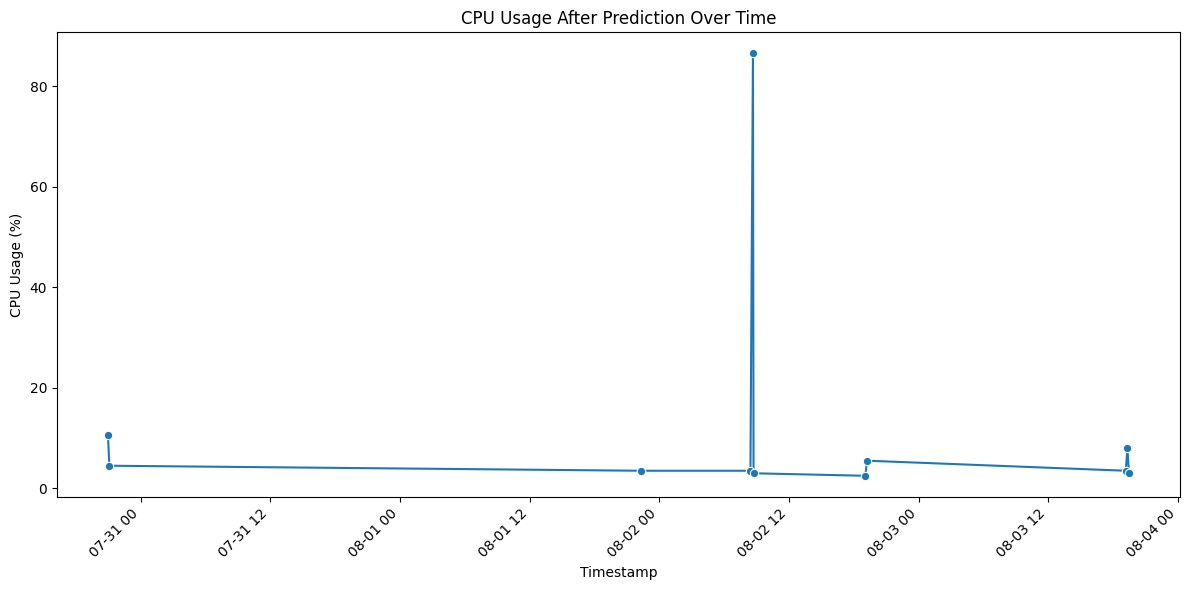

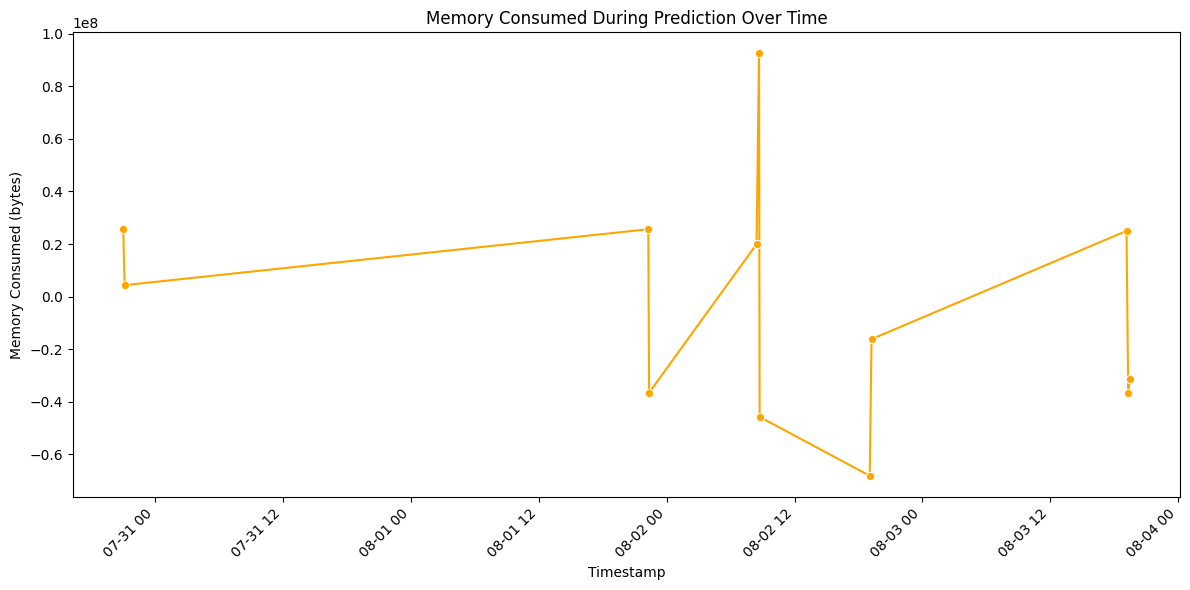


'label' column not found in the test data. Cannot calculate AUC or plot ROC curve.


In [47]:
# --- Step 10: Visualize historical resource usage ---

if not historical_resource_usage_df.empty:
    print("\n" + "="*50)
    print("VISUALIZING HISTORICAL RESOURCE USAGE")
    print("="*50)

    # Convert 'timestamp' column to datetime objects
    historical_resource_usage_df['timestamp'] = pd.to_datetime(historical_resource_usage_df['timestamp'], format='%Y%m%d_%H%M%S')

    # Sort by timestamp to ensure correct plotting order
    historical_resource_usage_df = historical_resource_usage_df.sort_values('timestamp')

    # Create a line plot for CPU usage after prediction
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=historical_resource_usage_df, x='timestamp', y='cpu_percent_after', marker='o')
    plt.title('CPU Usage After Prediction Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('CPU Usage (%)')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

    # Create a line plot for memory consumed during prediction
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=historical_resource_usage_df, x='timestamp', y='memory_consumed', marker='o', color='orange')
    plt.title('Memory Consumed During Prediction Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Memory Consumed (bytes)')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

else:
    print("\nNo historical resource usage data available for visualization.")


# --- Step 11: Plot ROC Curve and calculate AUC (original code) ---

from sklearn.metrics import roc_curve, auc, RocCurveDisplay # Import necessary metrics

if 'label' in combined_test_df_binary.columns:
    print("\n" + "="*50)
    print("ROC CURVE AND AUC SCORE (if true labels available)")
    print("="*50)

    y_true_binary = combined_test_df_binary['label']

    # Assuming the binary model predicts probabilities (most classifiers does)
    # If your model has a decision_function instead of predict_proba, you'll need to adjust
    if hasattr(loaded_binary_model, 'predict_proba'):
        y_scores_binary = loaded_binary_model.predict_proba(X_test_scaled_binary)[:, 1] # Probability of the positive class (Malware)

        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_true_binary, y_scores_binary)

        # Calculate AUC
        roc_auc = auc(fpr, tpr)
        print(f"\nAUC (Area Under the Curve): {roc_auc:.4f}")

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    elif hasattr(loaded_binary_model, 'decision_function'):
         print("\nModel has decision_function. ROC curve plotting from decision_function is not implemented here.")
         # You would need to calculate fpr, tpr, and thresholds from decision_function if needed.
         # y_scores_binary = loaded_binary_model.decision_function(X_test_scaled_binary)
         # fpr, tpr, thresholds = roc_curve(y_true_binary, y_scores_binary)
         # roc_auc = auc(fpr, tpr)
         # print(f"\nAUC (Area Under the Curve): {roc_auc:.4f}")
         # ... plotting code ...

    else:
        print("\nWarning: The loaded binary model does not have 'predict_proba' or 'decision_function'. Cannot plot ROC curve.")

else:
    print("\n'label' column not found in the test data. Cannot calculate AUC or plot ROC curve.")

## Summarize current usage

### Subtask:
Display the resource usage metrics for the current prediction run.


**Reasoning**:
Access and print the resource usage metrics from the `log_data` dictionary for the current prediction run, including appropriate labels and units.



In [48]:
# --- Step 11: Display current resource usage ---

print("\n" + "="*50)
print("CURRENT RESOURCE USAGE")
print("="*50)

# Access the log_data dictionary (created in the logging step)
if 'log_data' in locals():
    print(f"Timestamp: {log_data.get('timestamp', 'N/A')}")
    print(f"CPU Usage Before Prediction: {log_data.get('cpu_percent_before', 'N/A')}%")
    print(f"Memory Usage Before Prediction: {log_data.get('memory_before', 'N/A')} bytes")
    print(f"CPU Usage After Prediction: {log_data.get('cpu_percent_after', 'N/A')}%")
    print(f"Memory Usage After Prediction: {log_data.get('memory_after', 'N/A')} bytes")
    print(f"Memory Consumed During Prediction: {log_data.get('memory_consumed', 'N/A')} bytes")
else:
    print("Resource usage data (log_data) is not available.")

# --- Step 12: Plot ROC Curve and calculate AUC (original code, remains unchanged) ---

from sklearn.metrics import roc_curve, auc, RocCurveDisplay # Import necessary metrics

if 'label' in combined_test_df_binary.columns:
    print("\n" + "="*50)
    print("ROC CURVE AND AUC SCORE (if true labels available)")
    print("="*50)

    y_true_binary = combined_test_df_binary['label']

    # Assuming the binary model predicts probabilities (most classifiers does)
    # If your model has a decision_function instead of predict_proba, you'll need to adjust
    if hasattr(loaded_binary_model, 'predict_proba'):
        y_scores_binary = loaded_binary_model.predict_proba(X_test_scaled_binary)[:, 1] # Probability of the positive class (Malware)

        # Calculate ROC curve
        fpr, tpr, thresholds = roc_curve(y_true_binary, y_scores_binary)

        # Calculate AUC
        roc_auc = auc(fpr, tpr)
        print(f"\nAUC (Area Under the Curve): {roc_auc:.4f}")

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

    elif hasattr(loaded_binary_model, 'decision_function'):
         print("\nModel has decision_function. ROC curve plotting from decision_function is not implemented here.")
         # You would need to calculate fpr, tpr, and thresholds from decision_function if needed.
         # y_scores_binary = loaded_binary_model.decision_function(X_test_scaled_binary)
         # fpr, tpr, thresholds = roc_curve(y_true_binary, y_scores_binary)
         # roc_auc = auc(fpr, tpr)
         # print(f"\nAUC (Area Under the Curve): {roc_auc:.4f}")
         # ... plotting code ...

    else:
        print("\nWarning: The loaded binary model does not have 'predict_proba' or 'decision_function'. Cannot plot ROC curve.")

else:
    print("\n'label' column not found in the test data. Cannot calculate AUC or plot ROC curve.")



CURRENT RESOURCE USAGE
Timestamp: 20250803_192740
CPU Usage Before Prediction: 4.0%
Memory Usage Before Prediction: 4915302400 bytes
CPU Usage After Prediction: 3.0%
Memory Usage After Prediction: 4884078592 bytes
Memory Consumed During Prediction: -31223808 bytes

'label' column not found in the test data. Cannot calculate AUC or plot ROC curve.
